In [6]:
import scipy
import numpy
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')
from matplotlib.colors import LogNorm
from __future__ import division
from scipy import ndimage
%config InlineBackend.figure_format = 'retina'

In [7]:
import scipy
import scipy.fftpack
import pylab
from scipy import pi


from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam, p, niter=10):
  L = len(y)
  D = sparse.csc_matrix(np.diff(np.eye(L), 2))
  w = np.ones(L)
  for i in xrange(niter):
    W = sparse.spdiags(w, 0, L, L)
    Z = W + lam * D.dot(D.transpose())
    z = spsolve(Z, w*y)
    w = p * (y > z) + (1-p) * (y < z)
  return z

In [8]:
exp1 = np.fromfile('D://osc.dat',dtype=float,count=-1, sep=" ")
exp2 = np.fromfile('D://m.dat',dtype=float,count=-1, sep=" ")
exp4 = np.fromfile('D://qpc.dat',dtype=float,count=-1, sep=" ")

IOError: [Errno 2] No such file or directory: 'D://osc.dat'

In [ ]:
exp4 = np.reshape(exp4, (-1, 3))
exp4=np.transpose(exp4)

In [ ]:
exp1 = np.reshape(exp1, (251, 1001))
exp1=np.transpose(exp1)
#exp1=exp1[0:580,50:251]
exp1=np.transpose(exp1)
exp2 = np.reshape(exp2, (161, 201))


In [ ]:
for i in xrange(251):
    exp3[i] = exp1[i]

In [ ]:
for i in xrange(251):
    dat=baseline_als(exp1[i],10000,0.0001,100)
    exp1[i]=exp1[i]-dat

In [ ]:
x=np.linspace(-2., -0.8, num=251)
x2=np.linspace(-2, 0, num=1001)
x3=np.linspace(-2, 0, num=1001)

In [ ]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(3, 3)
gs.update(left=0, right=0.7, wspace=0.2, hspace=0.2)
ax1 = plt.subplot(gs[0:2, 0:2])
xt=np.linspace(-2.0, -0.0, num=4)
plt.imshow(exp1, interpolation='none', aspect='auto',cmap='bwr', vmax=1E-9, extent=
           [-2.0,0,-.800,-2.000])
plt.tick_params(labeltop=False, labelbottom=False, bottom=False, top=False, labelright=False)
#plt.colorbar(label='Conductance ($a.u.$)')
plt.ylabel("$V_{QPC}$ (V)")
plt.xticks(np.arange(xt.min(), xt.max(),0.200))
plt.ylim(-0.8,-1.8)
plt.xlim(-0.8,-2)
#plt.title('Concave lense at 1st plateau') 
ax2 = plt.subplot(gs[2,0:2])

plt.plot(x2,exp1[70]*1E9, 'k')
#plt.plot(x2,exp1[90]*1E9, 'b')
#plt.plot(x2,exp1[110]*1E9, 'r')
plt.xlim(-0.8,-2)
plt.xticks(np.arange(xt.min(), xt.max(),0.200))

plt.xlabel("$V_{L}$ (V)")
plt.ylabel("$I$ (nA)")
#plt.xlim(0,550)
plt.ylim(0,0.2)
yt=np.linspace(0, 0.2, num=4)
plt.yticks(np.arange(yt.min(), yt.max(),0.2))
ax3 = plt.subplot(gs[0:2:, 2])


plt.plot(exp4[1],exp4[0],'r')
plt.tick_params(labeltop=False, labelbottom=True, bottom=False, top=False, labelleft=False)
#yt=np.linspace(0, 0.5, num=4)
#plt.xticks(np.arange(yt.min(), yt.max(),0.1))
plt.xlabel("$V_L$ (V)")
plt.xlabel("$I$ (nA)")
plt.ylim(-0.8,-1.8)
plt.xlim(-0.1E-7,0.7E-7)


#plt.savefig('D:\\1.pdf', format='pdf')

In [ ]:
for i in xrange(251):
    dat=baseline_als(exp1[i],10000,0.0001,100)
    exp1[i]=exp1[i]-dat

In [ ]:
plt.imshow(exp1[0:201,0:301])

In [ ]:
plt.plot(exp1[75,0:301])
plt.plot(exp1[100,0:301])
plt.plot(exp1[150,0:301])

In [ ]:
a=np.linspace(0, 0, num=201)
b=np.linspace(0, 0, num=201)

In [ ]:
#!/usr/bin/env python
#<examples/doc_basic.py>
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import numpy as np
# create data to be fitted
for i in range(0,201):
    x=np.linspace(-0.8, -1.8, num=300)
    data=exp1[i,0:300]*1E9
    res=np.linspace(4.2, 3.6, num=201)
    A=3.59981188905019e-2
    B=1.2267524610604356e-2
    f=26.816051773215591
    def fcn2min(params, x, data):
    #    A = params['A']
    #    B = params['B']
    #    f = params['f']
        p = params['p']
    #    C = params['C']
        res=A+B*np.sin(f*x+p)
        return res - data
    
# create a set of Parameters
    params = Parameters()
#    params.add('A',   value= 3.59981188905019e-11)
#    params.add('B', value= 1.2267524610604356e-11)
#    params.add('f',   value= 26.816051773215591)
#    params.add('C',   value= 0)
    params.add('p', value= np.pi/2)       

# do fit, here with leastsq model
    minner = Minimizer(fcn2min, params, fcn_args=(x, data))
    kws  = {'options': {'maxiter':100}}
    result = minner.minimize()
    result.params

# calculate final result
    final = data + result.residual
    exp3[i,0:300]=final
# write error report
  #  report_fit(result)
    #expp2[i]=final
# try to plot results
    plt.plot(x, data, 'o')
    plt.plot(x, final, 'r')
    #plt.ylim(9,10)
    params2=result.params
    v = params2.valuesdict()
    a[i]=v['p']
#    b[i]=v['B']
#plt.savefig('D:\\sl2.pdf', format='pdf')

In [5]:
plt.imshow(exp3[0:201,0:300],vmax=0.2)

NameError: name 'exp3' is not defined

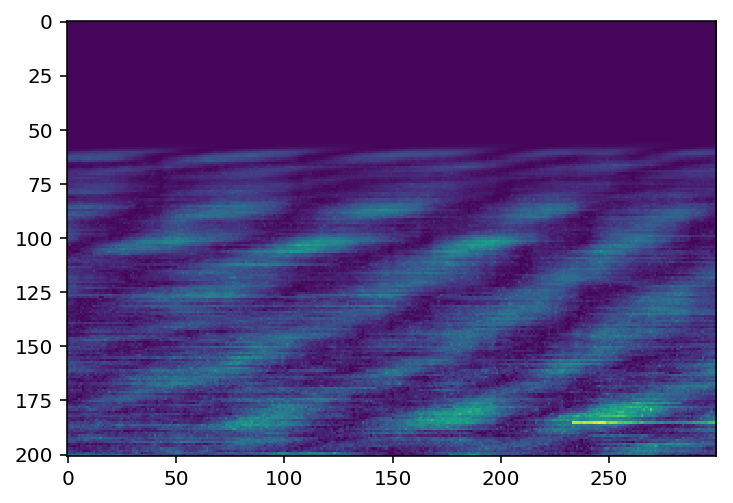

In [41]:
plt.imshow(exp1[0:201,0:300])

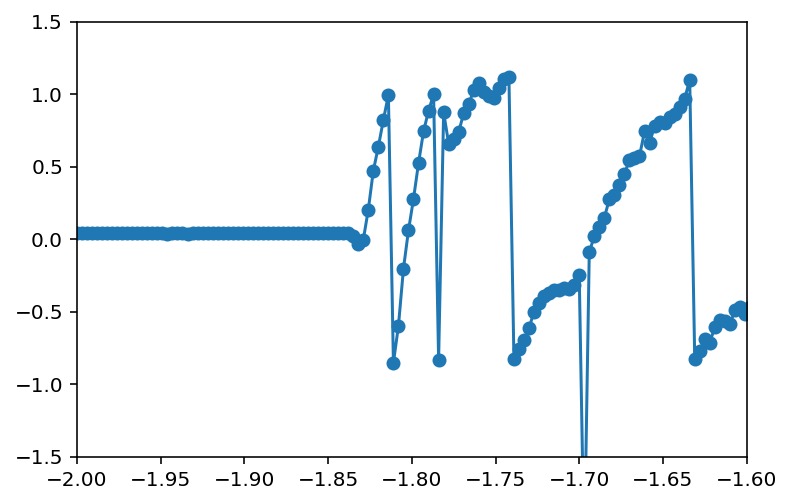

In [42]:

#for i in range(0,201):
#    plt.plot(expp1[i])
x=np.linspace(-2, -1.4, num=201)
plt.plot(x,(a-2)*-1/3.14,'o-')
#plt.plot(exp4[0],exp4[1]*4E9,'r')
plt.xlim(-2,-1.6)
plt.ylim(-1.5,1.5)
#plt.plot(x,(np.transpose(expp1))[9]*1E9, '-k')
np.savetxt('D:\\pha', a, delimiter=' ') 

In [43]:
x=np.linspace(-0.8, -1.8, num=300)
plt.plot(x, expp1[70], 'r')

np.savetxt('D:\\fit1', expp1[10], delimiter=' ') 

NameError: name 'expp1' is not defined

In [ ]:
expp1[10].shape

In [4]:
plt.imshow(expp1)

NameError: name 'expp1' is not defined

In [ ]:
plt.imshow(expp1)

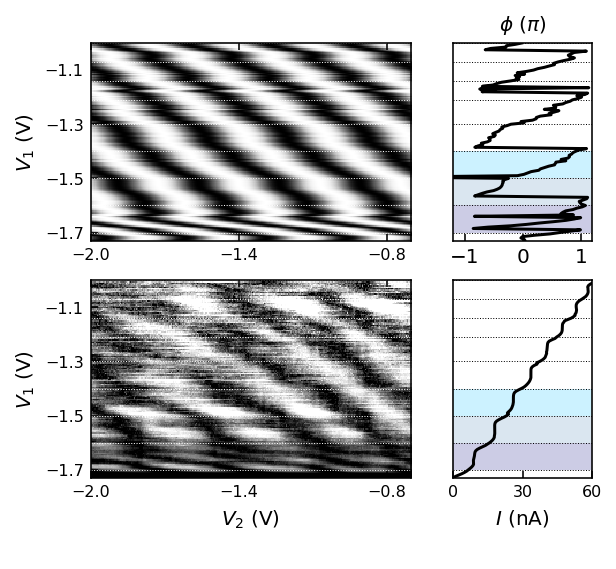

In [48]:
import matplotlib.gridspec as gridspec
#plt.rc('font', family='serif')
import matplotlib.patches as patches

fig = plt.figure()
gs = gridspec.GridSpec(4,5)
gs.update(left=0, right=1, wspace=0.3, hspace=0.5)

ax1 = plt.subplot(gs[0:2, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp3[0:201,0:300]*1E9, interpolation='none', aspect='auto',cmap='Greys_r', extent=[-2.0,-0.6,-1.00,-2.000])

from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.7, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='w', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=8)
#plt.xlabel("$V_{2}$ (V)", color='k',fontsize=12)
plt.ylim(-1.73,-1)
plt.xlim(-2,-0.7)

ax4 = plt.subplot(gs[0:2:, 2])

xxx=np.linspace(-2, -1, num=201)
#x6=np.linspace(-2., -0.8, num=251)
plt.plot((a-2)*-1/3.14,xxx,'k-')

plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
#xt=np.linspace(0, 0.5, num=4)
#plt.text(1, -0.95, '(2)',color='k', rotation=0,fontsize=8)
plt.title('$\phi$ ($\pi$)', color='black',fontsize=10)
plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
#plt.xticks(np.arange(xt.min(), xt.max(),0.2),fontsize=6)

# P.arrow( x, y, dx, dy, **kwargs )


plt.annotate('1st', xy=(2,-1.72), xytext=(2,-1.72),color='#000080',fontsize=8)
plt.annotate('2nd', xy=(2,-1.62), xytext=(2,-1.61),color='#4682B4',fontsize=8)
plt.annotate('3rd', xy=(2,-1.52), xytext=(2,-1.5),color='#00BFFF',fontsize=8)

#plt.xlabel("$V_2$ (V)")
#plt.xlabel("$I$ (nA)")
plt.xlim(-1.2,1.2)
plt.ylim(-1.73,-1)

ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 6, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 6, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 6, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))
#########################################
##########################################
ax1 = plt.subplot(gs[2:4, 0:2])

xt=np.linspace(-2.0, -0.6, num=4)

cf=plt.imshow(exp1[0:201,0:300]*1E9, interpolation='none', aspect='auto',cmap='Greys_r',vmax=0.18,vmin=0.01, extent=[-2.0,-0.6,-1.00,-2.000])




from matplotlib import ticker

#cb = plt.colorbar(cf,ticks=[ 0,0.7])

#cb.set_label('$I$ (nA)')
#cb.set_ticklabels([0, 1.6])
#for l in cb.ax.yaxis.get_ticklabels():
#    l.set_size(20)
#plt.text(-1.4, -1.2, '(1)',color='k', rotation=0,fontsize=8)
#plt.text(-0.8, -1.1, 'Transparent', rotation=90,fontsize=8)
#plt.annotate('Resonant',color='k', xy=(-1.7,-1.2), xytext=(-2,-0.9),
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 )
#plt.annotate('Chaotic',color='k', xy=(-1.1,-1.2), xytext=(-1.4,-0.9), 
#             arrowprops=dict(width=0.5, headwidth=2, facecolor='k',shrink=0.1),fontsize=8 ) 
plt.axhline(y=-1.7, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='w', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='w', linestyle='dotted',lw=0.5)
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=True, labelright=False)

x=[-1.52,-1.37,-1.22]
y=[-1.1,-1.25,-1.5]


#coefficients = numpy.polyfit(x, y, 3)
#polynomial = numpy.poly1d(coefficients)
#xs=np.linspace(-1.53,-1.15,4000)
#ys = polynomial(xs)
#ax1.plot(xs,ys,'k-')

plt.yticks([-0.8,-1.1,-1.3,-1.5,-1.7],fontsize=8)
plt.ylabel("$V_{1}$ (V)", color='k',fontsize=10)
plt.xticks(np.arange(xt.min(), xt.max(),0.6),fontsize=8)
plt.xlabel("$V_{2}$ (V)", color='k',fontsize=10)
plt.ylim(-1.73,-1)
plt.xlim(-2,-0.7)


ax4 = plt.subplot(gs[2:4, 2])

plt.plot(exp4[1]*1E9,exp4[0],'k')
plt.tick_params(direction='in',labeltop=False, labelbottom=True, bottom=True, top=False, labelleft=False,left=False, right=False)
xt=np.linspace(0, 70, num=4)
plt.xlabel('$I$ (nA)', color='black',fontsize=10)

plt.axhline(y=-1.7, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.6, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.5, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.4, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.3, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.21, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.14, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.07, color='k', linestyle='dotted',lw=0.5)
plt.axhline(y=-1.0, color='k', linestyle='dotted',lw=0.5)
plt.xticks(np.arange(xt.min(), xt.max(),30),fontsize=8)
#plt.annotate('1st', xy=(2,-1.72), xytext=(2.1,-1.70),color='black')
#plt.annotate('2nd', xy=(2,-1.62), xytext=(2.1,-1.59),color='blue')
#plt.annotate('3rd', xy=(2,-1.52), xytext=(2.1,-1.48),color='red')
plt.xlim(0,6E1)
plt.ylim(-1.73,-1)
ax4.add_patch(patches.Rectangle(
        (-2, -1.7), 600, 0.1,
        alpha=0.2, facecolor="#000080"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.6), 600, 0.1,
        alpha=0.2,facecolor="#4682B4"
    ))
ax4.add_patch(patches.Rectangle(
        (-2, -1.5), 600, 0.1,
        alpha=0.2, facecolor="#00BFFF"
    ))






plt.savefig('D:\\test\\phase.pdf',bbox_inches='tight', format='pdf',dpi = 1000)